# A/B Testing
In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called *A/B testing*. The name refers to the labels of the two samples, A and B.

We will develop the method in the context of an example. The data come from a sample of newborns in a large hospital system. We will treat it as if it were a simple random sample though the sampling was done in multiple stages. [Stat Labs](https://www.stat.berkeley.edu/~statlabs/) by Deborah Nolan and Terry Speed has details about a larger dataset from which this set is drawn. 

In [1]:
path_data = '../../data/'

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## Smokers and Nonsmokers
The table `births` contains the following variables for 1,174 mother-baby pairs: the baby's birth weight in ounces, the number of gestational days, the mother's age in completed years, the mother's height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [2]:
births = pd.read_csv(path_data + 'baby.csv')
births

Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
0              120               284            27               62   
1              113               282            33               64   
2              128               279            28               64   
3              108               282            23               67   
4              136               286            25               62   
...            ...               ...           ...              ...   
1169           113               275            27               60   
1170           128               265            24               67   
1171           130               291            30               65   
1172           125               281            21               65   
1173           117               297            38               65   

      Maternal Pregnancy Weight  Maternal Smoker  
0                           100            False  
1                           135            False  
2                           115             True  
3                           125             True  
4                            93            False  
...                         ...              ...  
1169                        100            False  
1170                        120            False  
1171                        150             True  
1172                        110            False  
1173                        129            False  

[1174 rows x 6 columns]

One of the aims of the study was to see whether maternal smoking was associated with birth weight. Let's see what we can say about the two variables.

We'll start by selecting just `Birth Weight` and `Maternal Smoker`. There are 715 non-smokers among the women in the sample, and 459 smokers.

In [3]:
# smoking_and_birthweight = births[['Maternal Smoker', 'Birth Weight']]          ### double brackets
smoking_and_birthweight = births.loc[ : , ['Maternal Smoker', 'Birth Weight']]   ### .loc by label
smoking_and_birthweight

Maternal Smoker  Birth Weight
0               False           120
1               False           113
2                True           128
3                True           108
4               False           136
...               ...           ...
1169            False           113
1170            False           128
1171             True           130
1172            False           125
1173            False           117

[1174 rows x 2 columns]

In [4]:
smoking_and_birthweight.dtypes

Maternal Smoker     bool
Birth Weight       int64
dtype: object

In [5]:
smoking_and_birthweight.info

<bound method DataFrame.info of       Maternal Smoker  Birth Weight
0               False           120
1               False           113
2                True           128
3                True           108
4               False           136
...               ...           ...
1169            False           113
1170            False           128
1171             True           130
1172            False           125
1173            False           117

[1174 rows x 2 columns]>

In [40]:
# smoking_and_birthweight.groupby('Maternal Smoker')['Birth Weight'].count()
# pd.DataFrame({ 'count': smoking_and_birthweight.groupby('Maternal Smoker')['Birth Weight'].count()})

pd.DataFrame({ 'count': smoking_and_birthweight.groupby('Maternal Smoker')['Birth Weight'].count()}).reset_index()

# smoking_and_birthweight.groupby('Maternal Smoker').size()
# pd.DataFrame({'count': smoking_and_birthweight.groupby('Maternal Smoker').size()})
# smoking_and_birthweight.groupby('Maternal Smoker').size().to_frame('count')

Maternal Smoker  count
0            False    715
1             True    459

Let's look at the distribution of the birth weights of the babies of the non-smoking mothers compared to those of the smoking mothers. To generate two overlaid histograms, we will use `hist` with the optional `group` argument which is a column label or index. The rows of the table are first grouped by this column and then a histogram is drawn for each one.

In [31]:
smoker = births[births['Maternal Smoker'] == True]
non_smoker = births[births['Maternal Smoker'] == False]

In [32]:
smoker

Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
2              128               279            28               64   
3              108               282            23               67   
8              143               299            30               66   
10             144               282            32               64   
11             141               279            23               63   
...            ...               ...           ...              ...   
1162           143               281            28               65   
1163           113               287            29               70   
1164           109               244            21               63   
1165           103               278            30               60   
1171           130               291            30               65   

      Maternal Pregnancy Weight  Maternal Smoker  
2                           115             True  
3                           125             True  
8                           136             True  
10                          124             True  
11                          128             True  
...                         ...              ...  
1162                        135             True  
1163                        145             True  
1164                        102             True  
1165                         87             True  
1171                        150             True  

[459 rows x 6 columns]

/var/folders/g4/v24tl8t172g5d7rzsd63y51w0000gp/T/ipykernel_36203/2966918115.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])


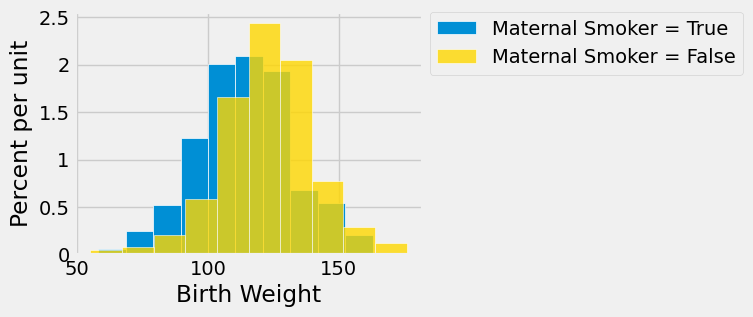

In [34]:
# smoking_and_birthweight.hist('Birth Weight', by='Maternal Smoker')   ### 2 subplots
unit = ''

fig, ax = plt.subplots(figsize=(4,3))
# sns.histplot(
    # data=smoking_and_birthweight, 
    # hue='Maternal Smoker', 
    # bins=10,
    # stat="percent", 
    # common_norm=False,     ### percent within each hue group
ax.hist(
    smoker['Birth Weight'], 
    label='Maternal Smoker = True', 
    density=True,
    ec='white'
    )
ax.hist(
    non_smoker['Birth Weight'],
    label='Maternal Smoker = False', 
    density=True,
    color='gold',
    alpha=.8,
    ec='white'
    )

y_vals = ax.get_yticks()
y_label = 'Percent per ' + (unit if unit else 'unit')
x_label = 'Birth Weight'
ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
# plt.title('')
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.)
# plt.legend()
# plt.tight_layout()
# fig.tight_layout(rect=[0, 0, 0.85, 1])


The distribution of the weights of the babies born to mothers who smoked appears to be based slightly to the left of the distribution corresponding to non-smoking mothers. The weights of the babies of the mothers who smoked seem lower on average than the weights of the babies of the non-smokers. 

This raises the question of whether the difference reflects just chance variation or a difference in the distributions in the larger population. Could it be that there is no difference between the two distributions in the population, but we are seeing a difference in the samples just because of the mothers who happened to be selected?

## The Hypotheses
We can try to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference in the populations; the distributions in the samples are different just due to chance. 

Formally, this is the null hypothesis. We are going to have to figure out how to simulate a useful statistic under this hypothesis. But as a start, let's just state the two natural hypotheses.

**Null hypothesis:** In the population, the distribution of birth weights of babies is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

**Alternative hypothesis:** In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

## Test Statistic
The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic. 

We will do the subtraction in the order "average weight of the smoking group $-$ average weight of the non-smoking group". Small values (that is, large negative values) of this statistic will favor the alternative hypothesis. 

The observed value of the test statistic is about $-9.27$ ounces.

In [35]:
means_table = smoking_and_birthweight.groupby('Maternal Smoker').mean()
means_table

Birth Weight
Maternal Smoker              
False              123.085315
True               113.819172

In [36]:
means = means_table.iloc[:,0]
# means
observed_difference = means[1] - means[0]
observed_difference

/var/folders/g4/v24tl8t172g5d7rzsd63y51w0000gp/T/ipykernel_36203/2785131660.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  observed_difference = means[1] - means[0]


np.float64(-9.266142572024918)

We are going compute such differences repeatedly in our **simulations** below, so we will define a function to do the job. The function takes two arguments:

- the name of the table of data
- the label of the column that contains the numerical variable whose average is of interest
- the label of the column that contains the Boolean variable for grouping

It returns the difference between the means of the `True` group and the `False` group.

In [37]:
def difference_of_means(table, label, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table[[label, group_label]]
    means_table = reduced.groupby(group_label).mean()
    means = means_table[label]
    return means.iloc[1] - means.iloc[0]

To check that the function is working, let's use it to calculate the observed difference between the mean birth weights of the two groups in the sample.

In [38]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

np.float64(-9.266142572024918)

That's the same as the value of `observed_difference` calculated earlier.

## Predicting the Statistic Under the Null Hypothesis

To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on *random permutations* does just that.

If there were no difference between the two distributions in the underlying population, then whether a birth weight has the label `True` or `False` with respect to maternal smoking should make no difference to the average. The idea, then, is to shuffle all the labels randomly among the mothers. This is called *random permutation*. 

Shuffling ensures that the count of `True` labels does not change, and nor does the count of `False` labels. This is important for the comparability of the simulated differences of means and the original difference of means. We will see later in the course that the sample size affects the variability of a sample mean.

Take the difference of the two new group means: the mean weight of the babies whose mothers have been randomly labeled smokers and the mean weight of the babies of the remaining mothers who have all been randomly labeled non-smokers. This is a simulated value of the test statistic under the null hypothesis.

Let's see how to do this. It's always a good idea to start with the data. We have reduced the table to have just the columns that we need.

In [39]:
smoking_and_birthweight

Maternal Smoker  Birth Weight
0               False           120
1               False           113
2                True           128
3                True           108
4               False           136
...               ...           ...
1169            False           113
1170            False           128
1171             True           130
1172            False           125
1173            False           117

[1174 rows x 2 columns]

There are 1,174 rows in the table. To shuffle all the labels, we will draw a random sample of 1,174 rows without replacement. Then the sample will include all the rows of the table, in random order. 

We can use the Table method `sample` with the optional `replace=False` argument. We have to specify a sample size, and we use the `len()` of the dataframe for `sample` to draws all rows rows in the table.

In [14]:
smoking_and_birthweight2 = smoking_and_birthweight.copy()
shuffled_labels = smoking_and_birthweight2.sample(len(smoking_and_birthweight2), replace = False)
shuffled_labels = np.array(shuffled_labels['Maternal Smoker'])
smoking_and_birthweight2['Shuffled Label'] = shuffled_labels
original_and_shuffled = smoking_and_birthweight2

In [15]:
original_and_shuffled.head(10)

Maternal Smoker  Birth Weight  Shuffled Label
0            False           120           False
1            False           113            True
2             True           128           False
3             True           108           False
4            False           136            True
5            False           138            True
6            False           132           False
7            False           120           False
8             True           143           False
9            False           140           False

Each baby's mother now has a random smoker/non-smoker label in the column `Shuffled Label`, while her original label is in `Maternal Smoker`. If the null hypothesis is true, all the random re-arrangements of the labels should be equally likely.

Let's see how different the average weights are in the two randomly labeled groups.

In [16]:
shuffled_only = original_and_shuffled[['Birth Weight', 'Shuffled Label']]
shuffled_group_means = shuffled_only.groupby('Shuffled Label').mean()
shuffled_group_means.reset_index()

Shuffled Label  Birth Weight
0           False    118.806993
1            True    120.483660

The averages of the two randomly selected groups are quite a bit closer than the averages of the two original groups. We can use our function `difference_of_means` to find the two differences.

In [17]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

np.float64(1.6766671237259487)

In [18]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

np.float64(-9.266142572024918)

But could a different shuffle have resulted in a larger difference between the group averages? To get a sense of the variability, we must simulate the difference many times. 

As always, we will start by defining a function that simulates one value of the test statistic under the null hypothesis. This is just a matter of collecting the code that we wrote above. But because we will later want to use the same process for comparing means of other variables, we will define a function that takes three arguments:

- the name of the table of data
- the label of the column that contains the numerical variable
- the label of the column that contains the Boolean variable for grouping

It returns the difference between the means of two groups formed by randomly shuffling all the labels.

In [19]:
# def one_simulated_difference(table, label, group_label):
    
#     shuffled_labels = table[group_label].sample(len(table), replace = False)     ### series, will re-align
#     shuffled_labels = np.array(shuffled_labels[group_label])            ### arrya, just use .values

#     table_shuffled = table.copy()                                              ### make a copy
    
#     table_shuffed['Shuffled Label'] = shuffled_labels                         ### add to df
#     # original_and_shuffled = births1

#     # shuffled_only = original_and_shuffled.drop(columns=['Maternal Smoker'])
#     # shuffled_group_means = shuffled_only.groupby('Shuffled Label').mean()
#     # table1 = shuffled_group_means.reset_index()
#     group_means = table_shuffled.groupby('Shuffled Label')[label].mean().reset_index()

    
#     return difference_of_means(group_means, label, 'Shuffled Label')   

def one_simulated_difference(table, label, group_label):
    
    ### shuffle the group labels (use .values to avoid index re-alignment)
    shuffled_labels = table[group_label].sample(len(table), replace=False).values
    
    ### add shuffled labels to a copy of the table
    table_shuffled = table.copy()
    table_shuffled['Shuffled Label'] = shuffled_labels
    
    ### calculate group means and compute difference
    group_means = table_shuffled.groupby('Shuffled Label')[label].mean().reset_index()
    
    return difference_of_means(group_means, label, 'Shuffled Label')

Run the cell below a few times to see how the output changes.

In [20]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

np.float64(1.2473970473970581)

## Permutation Test
Tests based on random permutations of the data are called *permutation tests*. We are performing one in this example. In the cell below, we will simulate our test statistic – the difference between the average birth weight of the two randomly formed groups – many times and collect the differences in an array. 

In [21]:
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

differences

array([ 0.53910142,  0.91828999, -2.0973323 , ...,  0.93617624,
       -0.21927571, -0.83456282], shape=(5000,))

The array `differences` contains 5,000 simulated values of our test statistic: the difference between the mean weight in the smoking group and the mean weight in the non-smoking group, when the labels have been assigned at random. 

## Conclusion of the Test
The histogram below shows the distribution of these 5,000 values. It is the empirical distribution of the test statistic simulated under the null hypothesis. This is a prediction about the test statistic, based on the null hypothesis.

Observed Difference: -9.266142572024918


/var/folders/g4/v24tl8t172g5d7rzsd63y51w0000gp/T/ipykernel_36203/1889598791.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])


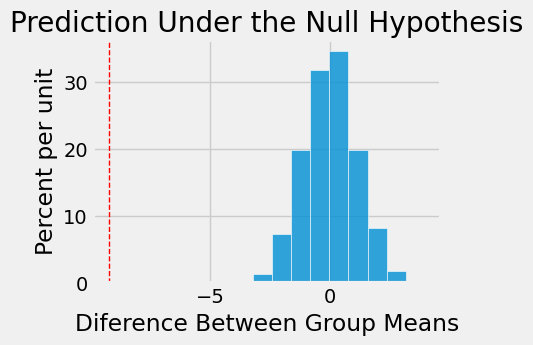

In [22]:
test_conclusion = pd.DataFrame({'Difference Between Group Means':differences})

print('Observed Difference:', observed_difference)

fig, ax = plt.subplots(figsize=(4,3))

ax.hist(test_conclusion, density=True, alpha=0.8, ec='white')

y_vals = ax.get_yticks()
unit = 'unit'     ### specific unit name for this data
y_label = f'Percent per {unit}'
x_label = 'Diference Between Group Means'
ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title('Prediction Under the Null Hypothesis');

ax.axvline(observed_difference, color='red', linestyle='--', 
           linewidth=1, label='Observed')

### The p-Value

Notice how the distribution is centered roughly around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about $-9.27$ ounces, which doesn't even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are **inconsistent**. 

The conclusion of the test is that **the data favor the alternative over the null**. It supports the hypothesis that **the average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers**.

If you want to compute an empirical p-value, remember that low values of the statistic favor the alternative hypothesis. 

In [23]:
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

np.float64(0.0)

The empirical p-value is 0, meaning that none of the 5,000 permuted samples resulted in a difference of -9.27 or lower. This is only an approximation. The exact chance of getting a difference in that range is not 0. But it is vanishingly small, according to our simulation, and therefore we can reject the null hypothesis.

## Another Permutation Test

We can use the same method to compare other attributes of the smokers and the non-smokers, such as their ages. Histograms of the ages of the two groups show that in the sample, the mothers who smoked tended to be younger. 

/var/folders/g4/v24tl8t172g5d7rzsd63y51w0000gp/T/ipykernel_36203/541211438.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])


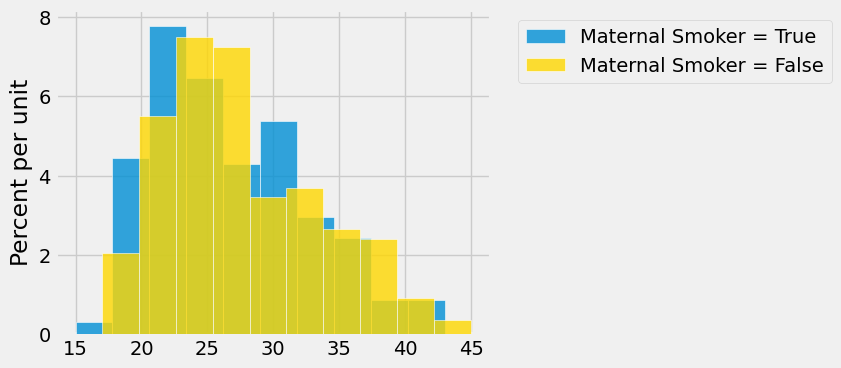

In [41]:
smoking_and_age = births[['Maternal Smoker', 'Maternal Age']]

fig, ax = plt.subplots(figsize=(5,4))

ax.hist(smoker['Maternal Age'], density=True, label='Maternal Smoker = True', alpha=0.8, ec='white', zorder=5)
ax.hist(non_smoker['Maternal Age'], density=True, label='Maternal Smoker = False', color='gold', alpha=0.8, ec='white', zorder=10)

y_vals = ax.get_yticks()
unit = 'unit'
y_label = f'Percent per {unit}'
x_label = ''
ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title('')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

The observed difference between the average ages is about $-0.8$ years.

In [42]:
observed_age_difference = difference_of_means(births, 'Maternal Age', 'Maternal Smoker')
observed_age_difference

np.float64(-0.8076725017901509)

Remember that the difference is calculated as the mean age of the smokers minus the mean age of the non-smokers. The negative sign shows that the smokers are younger on average.

Is this difference due to chance, or does it reflect an underlying difference in the population?

As before, we can use a permutation test to answer this question. If the underlying distributions of ages in the two groups are the same, then the empirical distribution of the difference based on permuted samples will predict how the statistic should vary due to chance.

In [26]:
age_differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, 'Maternal Age', 'Maternal Smoker')
    age_differences = np.append(age_differences, new_difference)

The observed difference is in the tail of the empirical distribution of the differences simulated under the null hypothesis. 

Observed Difference: -0.8076725017901509


/var/folders/g4/v24tl8t172g5d7rzsd63y51w0000gp/T/ipykernel_36203/1026390418.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])


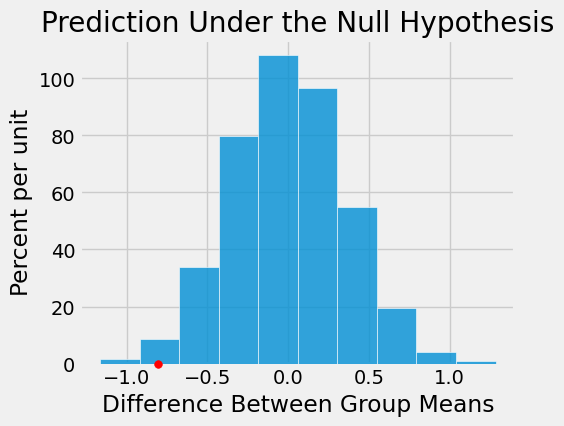

In [27]:
mean_differences = pd.DataFrame({'Difference Between Group Means':age_differences})

print('Observed Difference:', observed_age_difference)

fig, ax = plt.subplots(figsize=(5,4))

ax.hist(mean_differences, density=True, alpha=0.8, ec='white', zorder=5)

ax.scatter(observed_age_difference, 0, color='red', s=30, zorder=10).set_clip_on(False)

y_vals = ax.get_yticks()
unit = 'unit'
y_label = f'Percent per {unit}'
x_label = 'Difference Between Group Means'
ax.set_yticklabels(['{:g}'.format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title('Prediction Under the Null Hypothesis');
plt.show()

Once again, the empirical distribution of the simulated differences is centered roughly around 0, because the simulation is under the null hypothesis that there is no difference between the distributions of the two groups.

The empirical p-value of the test is the proportion of simulated differences that were equal to or less than the observed difference. This is because low values of the difference favor the alternative hypothesis that the smokers were younger on average.

In [28]:
empirical_P = np.count_nonzero(age_differences <= observed_age_difference) / 5000
empirical_P

np.float64(0.0094)

The empirical p-value is around 1% and therefore the result is statistically significant. The test supports the hypothesis that the smokers were younger on average.